In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
df = load_iris()

In [3]:
df = pd.DataFrame(df.data, columns= df.feature_names)

In [4]:
df["target"] = load_iris().target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.shape

(150, 5)

In [7]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

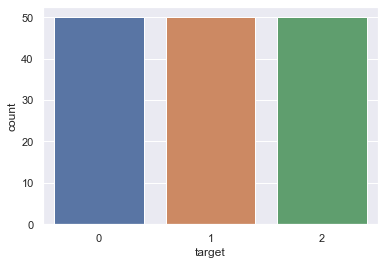

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set()
sns.countplot(df.target)
plt.show()

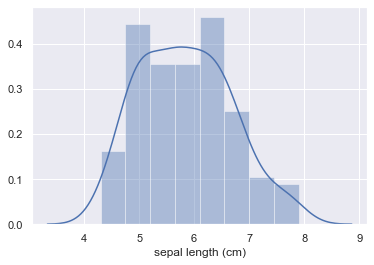

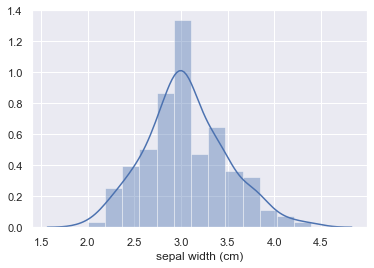

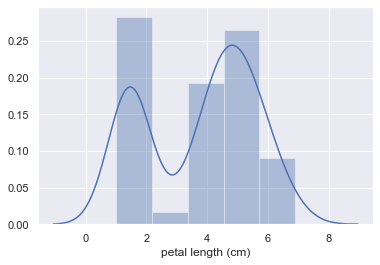

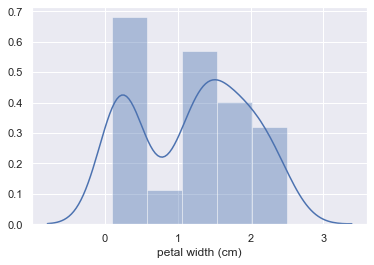

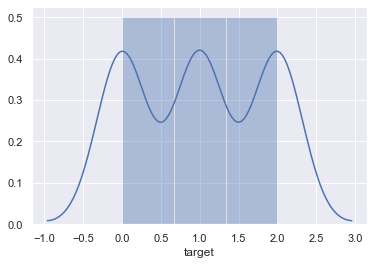

In [13]:
sns.set()
for i in df.columns.to_list():
    sns.distplot(df[i])
    plt.show()

In [14]:
def clean_name(name):
    return name.strip().lower().replace(" ", "_")

In [16]:
df.rename(columns = clean_name, inplace = True)

In [17]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


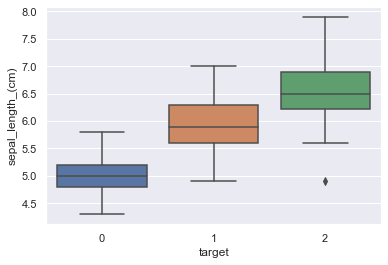

In [18]:
sns.boxplot(x="target", y ="sepal_length_(cm)", data= df)
plt.show()

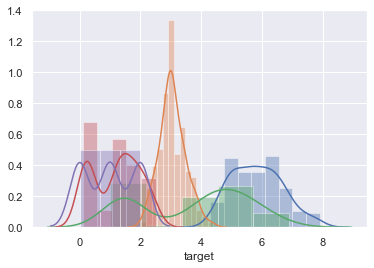

In [19]:
sns.set()
for i in df.columns.to_list():
    sns.distplot(df[i])

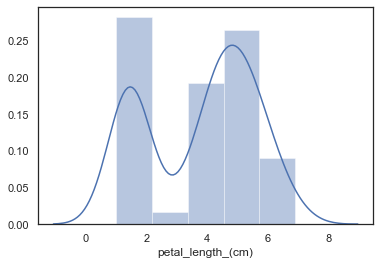

In [28]:
sns.color_palette("dark")
sns.set_style(style="white")
sns.distplot(df["petal_length_(cm)"], )
plt.show()

In [35]:
logged = np.log1p(df["petal_length_(cm)"])

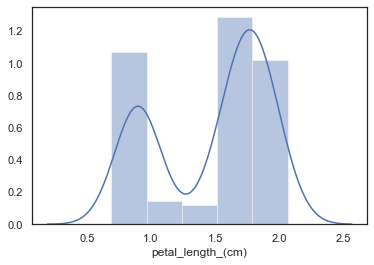

In [36]:
sns.color_palette("dark")
sns.set_style(style="white")
sns.distplot(logged)
plt.show()

In [37]:
X = load_iris().data
y = load_iris().target

In [39]:
X_train, X_test,  y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state= 42)

In [41]:
# Fitting logistic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=42)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = logit.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
conf  = confusion_matrix(y_test, y_pred)

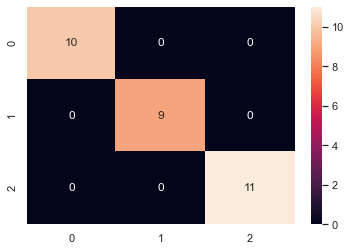

In [46]:
sns.heatmap(conf, annot = True)

In [47]:
print("The Accuracy on test set is ", round( accuracy_score(y_test, y_pred)*100, 2))

The Accuracy on test set is  100.0
